<a href="https://colab.research.google.com/github/rohang1411/Dog-Breed-Classification/blob/main/DogBreedClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import os
import cv2 as cv
import numpy as np
import pandas as pd

### Taking data drom Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive/DATASETS/dog-breed-identification

/content/drive/MyDrive/DATASETS/dog-breed-identification


In [5]:
!pwd

/content/drive/MyDrive/DATASETS/dog-breed-identification


In [6]:
!ls

dogbreedmodel.h5	  labels.csv  train
dogbreedmodelresnet50.h5  test	      train_x_dog_breed_classification.npy


##### Importing labels

In [7]:
labels = pd.read_csv('labels.csv')
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [8]:
labels_str_list = labels['breed'].unique()
labels_str_list 

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [9]:
breeds = ['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'border_collie', 'entlebucher', 'collie', 'malamute',
       'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malinois',
       'komondor', 'airedale', 'leonberg', 'mexican_hairless',
       'bull_mastiff', 'bernese_mountain_dog',
       'american_staffordshire_terrier', 'lhasa', 'cardigan',
       'italian_greyhound', 'clumber', 'scotch_terrier', 'afghan_hound',
       'old_english_sheepdog', 'saint_bernard', 'miniature_pinscher',
       'eskimo_dog', 'irish_wolfhound', 'brabancon_griffon',
       'toy_terrier', 'chow', 'flat-coated_retriever', 'norwich_terrier',
       'soft-coated_wheaten_terrier', 'staffordshire_bullterrier',
       'english_foxhound', 'gordon_setter', 'siberian_husky',
       'newfoundland', 'briard', 'chesapeake_bay_retriever',
       'dandie_dinmont', 'great_pyrenees', 'beagle', 'vizsla',
       'west_highland_white_terrier', 'kerry_blue_terrier', 'whippet',
       'sealyham_terrier', 'standard_poodle', 'keeshond',
       'japanese_spaniel', 'miniature_poodle', 'pomeranian',
       'curly-coated_retriever', 'yorkshire_terrier', 'pembroke',
       'great_dane', 'blenheim_spaniel', 'silky_terrier',
       'sussex_spaniel', 'german_short-haired_pointer', 'french_bulldog',
       'bouvier_des_flandres', 'tibetan_mastiff', 'english_springer',
       'cocker_spaniel', 'rottweiler']

In [10]:
len(labels['breed'].unique())

120

In [11]:
%cd train

/content/drive/My Drive/DATASETS/dog-breed-identification/train


In [12]:
len(os.listdir())

10224

In [13]:
len(labels)

10222

In [14]:
!pwd

/content/drive/My Drive/DATASETS/dog-breed-identification/train


### Sample Image After resizing

In [15]:
path = !pwd
path = path[0]
path

'/content/drive/My Drive/DATASETS/dog-breed-identification/train'

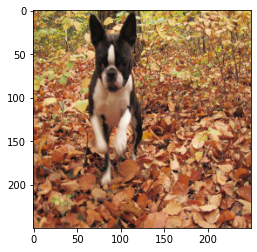

In [16]:
from matplotlib import pyplot as plt
from PIL import Image

img = Image.open(path + '/' + str(labels['id'][0])+ '.jpg')
img = np.asarray(img)
resimg = cv.resize(img, (250,250))
plt.imshow(resimg)

### Creating the training set

In [17]:
%cd ..

/content/drive/My Drive/DATASETS/dog-breed-identification


In [18]:
%cd train

/content/drive/My Drive/DATASETS/dog-breed-identification/train


Resizing all the images to 128 x 128 pixels and converting them to a numpy array

In [ ]:
train_x = []                                                                                                                                                                                                                                                                          

for i in range(10000):

  img = cv.imread(path + '/' + str(labels['id'][i])+ '.jpg')
  
  if type(img) == type(None):
    pass
  else:
    resimg = cv.resize(img, (128,128))
    train_x.append(resimg)
    tmp = i
    print("Processing file #",i)
    
print("Processed Training Data - %tmp files".format(tmp = tmp),i)
train_x = np.array(train_x)

In [20]:
temp_x = train_x

In [57]:
np.save("train_x_dog_breed_classification.npy", train_x)
files.download("train_x_dog_breed_classification.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
train_x = np.load("train_x_dog_breed_classification.npy")

In [23]:
len(train_x)

10000

### Creating the testing set

In [24]:
%cd ..

/content/drive/My Drive/DATASETS/dog-breed-identification


In [25]:
%cd test

/content/drive/My Drive/DATASETS/dog-breed-identification/test


In [26]:
test_x = []                                                                                                                                                                                                                                                                          

for i in range(10000):
  
  img = cv.imread(path + '/' + str(labels['id'][i]) + '.jpg')
  
  if type(img) == type(None):
    pass
  else:
    resimg = cv.resize(img, (128,128))
    test_x.append(resimg)
    tmp = i
    # print("Processing file #",i)
print("Processed Training Data - %tmp files".format(tmp = tmp),i)
test_x = np.array(test_x)

Processed Training Data - %tmp files 9999


In [58]:
np.save("test_x_dog_breed_classification.npy", test_x)
files.download("test_x_dog_breed_classification.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
test_x = np.load("test_x_dog_breed_classification.npy")

In [29]:
len(test_x)

10000

Converting labels into numerical data

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels['breed'] = le.fit_transform(labels['breed'])

In [31]:
len(labels['breed'].unique())  # Total no. of breeds

120

Text(0, 0.5, 'No. of samples')

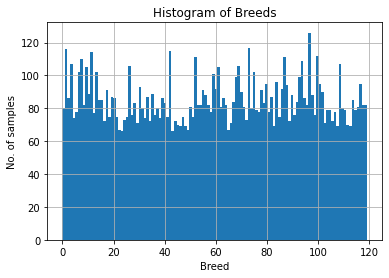

In [32]:
import pylab as pl
from pandas import *

histo_survived = labels.hist(bins=120)
pl.title("Histogram of Breeds")
pl.xlabel("Breed")
pl.ylabel("No. of samples")

In [33]:
labels.head()

id  breed
0  000bec180eb18c7604dcecc8fe0dba07     19
1  001513dfcb2ffafc82cccf4d8bbaba97     37
2  001cdf01b096e06d78e9e5112d419397     85
3  00214f311d5d2247d5dfe4fe24b2303d     15
4  0021f9ceb3235effd7fcde7f7538ed62     49

### Converting labels into Categorical data

In [34]:
y = labels['breed'][:10000].values
y_act = y

In [35]:
y = pd.get_dummies(y)

In [36]:
y

0    1    2    3    4    5    6    ...  113  114  115  116  117  118  119
0       0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1       0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2       0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3       0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
4       0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
9995    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
9996    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
9997    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
9998    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
9999    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[10000 rows x 120 columns]

In [37]:
y = y.values

In [38]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [39]:
train_x[0].shape, y[0].shape

((128, 128, 3), (120,))

In [40]:
len(train_x), len(y)

(10000, 10000)

### Custom Model

In [56]:
from tensorflow import keras
 
model = keras.Sequential([                                                    
                          keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(128,128,3)),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(32, (3,3), activation='relu'),
                          # keras.layers.MaxPool2D(2, 2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(1024, activation='relu'),
                          # keras.layers.Dropout(0.5),                                              # Here 50% networks will be broken
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(120, activation='softmax')
])


model.compile(optimizer='adam',
              loss = keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_x, y, epochs=30)

Epoch 1/30
313/313 [==============================] - 12s 37ms/step - loss: 5.7198 - accuracy: 0.0080
Epoch 2/30
313/313 [==============================] - 11s 37ms/step - loss: 4.7711 - accuracy: 0.0150
Epoch 3/30
313/313 [==============================] - 11s 36ms/step - loss: 4.6925 - accuracy: 0.0289
Epoch 4/30
313/313 [==============================] - 11s 36ms/step - loss: 4.4702 - accuracy: 0.0675
Epoch 5/30
313/313 [==============================] - 11s 36ms/step - loss: 4.0773 - accuracy: 0.1408
Epoch 6/30
313/313 [==============================] - 11s 36ms/step - loss: 3.6364 - accuracy: 0.2343
Epoch 7/30
313/313 [==============================] - 11s 36ms/step - loss: 3.1769 - accuracy: 0.3249
Epoch 8/30
313/313 [==============================] - 11s 36ms/step - loss: 2.8698 - accuracy: 0.3962
Epoch 9/30
313/313 [==============================] - 11s 36ms/step - loss: 2.5139 - accuracy: 0.4689
Epoch 10/30
313/313 [==============================] - 11s 36ms/step - loss: 2.250

In [42]:
%cd ..

/content/drive/My Drive/DATASETS/dog-breed-identification


In [59]:
model.save('dogbreedmodel.h5')

files.download('dogbreedmodel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
tmp = train_x[0]
tmp = tmp.reshape(-1, 128, 128, 3)

In [45]:
np.argmax(model.predict(tmp))

109

In [46]:
breeds[np.argmax(model.predict(tmp))]

'great_dane'

In [47]:
# model.evaluate(test_x, y)

### Model created  using Resnet50

In [48]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print("[INFO] preparing model...")
baseModel = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

headModel = baseModel.output
# headModel = Conv2D(64, (3,3), activation='relu')(headModel)
# headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
# headModel = Conv2D(64, (3,3), activation='relu')(headModel)
# headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.3)(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dense(120, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, y, epochs=50, batch_size=32)

[INFO] preparing model...
94773248/94765736 [==============================] - 0s 0us/step
Epoch 1/50
313/313 [==============================] - 17s 46ms/step - loss: 5.1736 - accuracy: 0.0156
Epoch 2/50
313/313 [==============================] - 14s 45ms/step - loss: 4.6736 - accuracy: 0.0264
Epoch 3/50
313/313 [==============================] - 14s 45ms/step - loss: 4.5352 - accuracy: 0.0392
Epoch 4/50
313/313 [==============================] - 14s 45ms/step - loss: 4.3291 - accuracy: 0.0598
Epoch 5/50
313/313 [==============================] - 14s 45ms/step - loss: 3.9087 - accuracy: 0.0956
Epoch 6/50
313/313 [==============================] - 14s 44ms/step - loss: 3.5030 - accuracy: 0.1378
Epoch 7/50
313/313 [==============================] - 14s 44ms/step - loss: 3.0947 - accuracy: 0.1993
Epoch 8/50
313/313 [==============================] - 14s 44ms/step - loss: 2.7055 - accuracy: 0.2612
Epoch 9/50
313/313 [==============================] - 14s 45ms/step - loss: 2.3912 - accuracy

In [49]:
model.save('dogbreedmodelresnet50.h5')

files.download('dogbreedmodelresnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
model.evaluate(test_x, y)

313/313 [==============================] - 14s 40ms/step - loss: 0.1272 - accuracy: 0.9659


[0.12716327607631683, 0.9659000039100647]

In [ ]:
labels.head()

In [ ]:
model.predict(tmp)

In [53]:
tmp = train_x[0]
tmp = tmp.reshape(-1, 128, 128, 3)
breeds[np.argmax(model.predict(tmp))]

'irish_setter'

In [54]:
cnt = 0
final_results = []
for i in range(len(test_x)):
  print(cnt)
  tmp = test_x[i].reshape(-1, 128, 128, 3)
  final_results.append(labels_list[np.argmax(model.predict(tmp))])
  cnt+=1

0


NameError: ignored

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image

img = Image.open(path + '/' + str(labels['id'][4])+ '.jpg')
img = np.asarray(img)
resimg = cv.resize(img, (128,128))
plt.imshow(resimg)

In [ ]:
%cd ..

In [ ]:
y_pred = final_results

In [ ]:
str(final_results)

In [ ]:
cnt = 0
for i in range(len(y_pred)):
  if y_pred[i] != labels['breed'][i]:
    cnt += 1
print(cnt)

In [ ]:
# Importing the dependancies
from sklearn import metrics
# Predicted values
# y_pred = ["a", "b", "c", "a", "b"]
# Actual valuefs
# y_act = ["a", "b", "c", "c", "a"]
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(labels['breed'][10000:], y_pred, labels['breed'].unique()))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(labels['breed'][10000:], y_pred, labels['breed'].unique()))